In [17]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn import model_selection , svm
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.classifier import PrecisionRecallCurve

In [18]:
train=pd.read_csv(r'C:\Users\TK\Desktop\Precily\data.csv', header=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6874 entries, 0 to 6873
Data columns (total 4 columns):
videoId        5103 non-null object
title          6874 non-null object
description    6270 non-null object
Category       6874 non-null object
dtypes: object(4)
memory usage: 214.9+ KB


In [19]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4891 entries, 0 to 4890
Data columns (total 4 columns):
videoId        4891 non-null object
title          4891 non-null object
description    4891 non-null object
Category       4891 non-null object
dtypes: object(4)
memory usage: 152.9+ KB


In [20]:
train.describe()

,videoId,title,description,Category
count,4891,4891,4891,4891
unique,2449,2443,2360,6
top,wcqyJplI3xg,March 2019 Board Exam | Science &amp; Technolo...,There are 500+ places of interest in the UK un...,Manufacturing
freq,3,4,62,1024


In [21]:
train.drop_duplicates(subset=None, keep='first', inplace=True)
train.reset_index(drop=True, inplace=True)
train.describe()

,videoId,title,description,Category
count,2450,2450,2450,2450
unique,2449,2443,2360,6
top,ZFsDzdBdzLQ,March 2019 Board Exam | Science &amp; Technolo...,There are 500+ places of interest in the UK un...,Manufacturing
freq,2,2,31,516


In [22]:
train['description'] = [entry.lower() for entry in train['description']]
train['description']= [word_tokenize(entry) for entry in train['description']]
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV


In [23]:
for index,entry in enumerate(train['description']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    train.loc[index,'text_final'] = str(Final_words)

In [24]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(train['text_final'],train['Category'],test_size=0.3)

In [25]:
trainEncoder = LabelEncoder()
Train_Y = trainEncoder.fit_transform(Train_Y)
Test_Y = trainEncoder.fit_transform(Test_Y)

In [26]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(train['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)


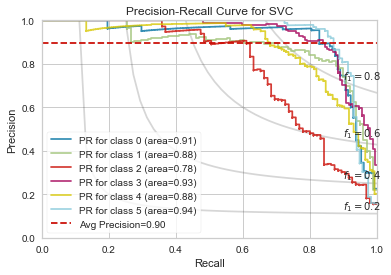

In [27]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
viz = PrecisionRecallCurve(
    SVM, per_class=True, iso_f1_curves=True,
    fill_area=False, micro=False
)
viz.fit(Train_X_Tfidf, Train_Y)
viz.score(Test_X_Tfidf, Test_Y)
viz.poof()

C:\Users\TK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: T

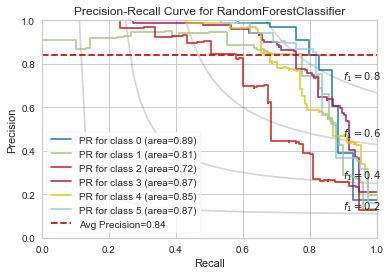

In [28]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(random_state=1)
viz = PrecisionRecallCurve(
    model, per_class=True, iso_f1_curves=True,
    fill_area=False, micro=False
)
viz.fit(Train_X_Tfidf, Train_Y)
viz.score(Test_X_Tfidf, Test_Y)
viz.poof()